# Week 2: Numerical Methods in Python

## Lecture 1: Chemical Reaction Equilibria and Roots of Equations

### Introduction to Chemical Reaction Equilibria

In chemical sciences, determining the equilibrium state of a reaction is crucial as it tells us the proportions of reactants and products when a reaction has reached a state where no further changes occur. This state is characterized by the minimization of the system's free energy, typically the Gibbs free energy at constant temperature and pressure.

Consider a classical chemical reaction such as water splitting into hydrogen and oxygen gas:

$$
2 \text{H}_2\text{O} \rightleftharpoons 2 \text{H}_2 + \text{O}_2
$$

At equilibrium, the reaction mixture conforms to the law of mass action, which relates the concentrations (or partial pressures) of the species to the equilibrium constant, $K_P$.

### Mathematical Formulation of Equilibrium Problems

For a given reaction, the equilibrium constant $K_P$ can be expressed as:

$$
K_P = \frac{(P_{\text{H}_2} / P^{\circ})^2)(P_{\text{O}_2} / P^{\circ})}{(P_{\text{H}_2\text{O}} / P^{\circ})^2}
$$

In the context of our example, starting with 2 moles of water vapor, the equilibrium concentrations can be formulated as follows using an ICE table:

| Species | Initial (mol) | Change (mol) | Equilibrium (mol) | Partial Pressure (bar) |
|---------|---------------|--------------|-------------------|------------------------|
| $\text{H}_2\text{O}$ | $2$ | $-2x$ | $2 - 2x$ | $(1 - x) P$ |
| $\text{H}_2$ | $0$ | $2x$ | $2x$ | $xP$ |
| $\text{O}_2$ | $0$ | $x$ | $x$ | $xP$ |

Here, $x$ represents the equilibrium progress of the reaction. 

### Numerical Methods for Finding Roots of Equations

Root-finding is a common numerical problem in chemical sciences, especially when dealing with non-linear equilibrium equations. Standard algorithms include:

- **Bisection Method**: Iteratively narrows down the range where a root lies.
- **Newton-Raphson Method**: Uses derivatives to converge to a root quickly.
- **Secant Method**: An approximation of Newton-Raphson that doesn’t require the derivative.

```{admonition} Note
:class: note
In practice, these methods are implemented using numerical libraries, such as `scipy.optimize` in Python, which we will explore shortly.
```

### Implementing Root-Finding Methods in Python

Let's start by solving a quadratic equation using both the quadratic formula and numerical methods. For instance, consider the equation:

$$
x^2 - 3x + 2 = 0
$$

Using the quadratic formula:

$$
x = \frac{3 \pm \sqrt{(-3)^2 - 4 \cdot 1 \cdot 2}}{2 \cdot 1} = 2, 1
$$

Now, let's use Python's `scipy.optimize.minimize` function to find these roots numerically.

In [50]:
from scipy.optimize import minimize

# Define the objective function
def quadratic_eq(x):
    return abs(x ** 2 - 3 * x + 2)

# Perform the minimization
result = minimize(
    fun=quadratic_eq,
    x0=0,
    method="Nelder-Mead",
    tol=1e-6
)

print(result["x"][0])  # Should print a value close to 1 or 2

1.0000000000000009


```{admonition} Initial Guess Matters
:class: warning
What do you think would happen if the initial guess was set to 2.1? Would it still find the same root?
```

Let's check:

In [51]:
result = minimize(
    fun=quadratic_eq,
    x0=2.1,
    method="Nelder-Mead",
    tol=1e-6
)

print(result["x"][0])  # Notice how it converges to a different root!

2.000000381469727


```{admonition} Note
:class: note
The initial guess significantly impacts the result, especially for non-linear or multi-root equations. 
```

### Example: Chemical Reaction Equilibrium via Numerical Method

For the water-splitting reaction at 1000 K, where $K_P = 10.060$:

In [52]:
def our_equation(x, K_P):
    return abs(K_P * (1 - x) ** 2 - x ** 2)

result = minimize(
    fun=our_equation,
    x0=0,
    args=(10.060,),
    method="Nelder-Mead",
    tol=1e-6
)

print("{:.0f}%".format(result["x"][0] * 100))  # Should print approximately 76%

76%


```{admonition} Warning
:class: warning
Always ensure the physical relevance of the solution. For example, $x$ must be between 0 and 1 (0% to 100% progress), which can be enforced using bounds:
```

In [53]:
result = minimize(
    fun=our_equation,
    x0=2,
    args=(10.060,),
    method="Nelder-Mead",
    tol=1e-6,
    bounds=[(0, 1)]
)

print("{:.0f}%".format(result["x"][0] * 100))  # This constraint helps avoid unphysical results.

76%


/var/folders/m3/5t_cnxn96vs1f6z07zkwy_k80000gn/T/ipykernel_48645/3060615363.py:1: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(


### Hands-On Activity: Solving a Chemical Equilibrium Problem

Now, let's revisit the cubic equation:

$$
x^3 - 6x^2 + 11x - 6 = 0
$$

Use the `minimize` function to find the roots with different initial guesses:

In [54]:
def cubic_eq(x):
    return abs(x ** 3 - 6 * x ** 2 + 11 * x - 6)

# Low initial guess
low_root_guess = minimize(
    fun=cubic_eq,
    x0=0.9,
    method="Nelder-Mead",
    tol=1e-6
)
print(low_root_guess["x"][0])  # Should be close to 1

# Medium initial guess
medium_root_guess = minimize(
    fun=cubic_eq,
    x0=1.9,
    method="Nelder-Mead",
    tol=1e-6
)
print(medium_root_guess["x"][0])  # Should be close to 2

# High initial guess
high_root_guess = minimize(
    fun=cubic_eq,
    x0=2.9,
    method="Nelder-Mead",
    tol=1e-6
)
print(high_root_guess["x"][0])  # Should be close to 3

1.0000003051757815
2.0000003433227533
3.000000019073487


```{admonition} Exercise
:class: tip
Try different initial guesses and see how they impact the results. Reflect on how the method converges based on your guess.
```

## Lecture 2: Chemical Bonding and Numerical Integration

The covalent bond is a cornerstone in the chemical sciences, dictating the chemical and physical properties of organic matter and also playing an important role in inorganic and solid-state/materials chemistry. The covalent bond is a quantum mechanical phenomenon, where electrons in atomic orbitals are shared between atoms, causing these atomic orbitals to hybridize and form molecular orbitals. The hybridization of atomic orbitals is primarily governed by the energetic similarity of the atomic orbitals involved and their spatial proximity and orientation. In quantum chemistry, the latter is quantified using the overlap integral, which takes the following form:

$$
S = \int_0^{\infty} \int_0^{\pi} \int_0^{2\pi} \psi_i^*(r, \theta, \phi) \psi_j(r, \theta, \phi) r^2 \sin(\theta) dr d\theta d\phi
$$

Here, $\psi_i$ and $\psi_j$ are the atomic orbitals of atoms $i$ and $j$, respectively. These atomic orbitals are written in spherical coordinates, where the volume element of integration is $r^2 \sin(\theta) dr d\theta d\phi$. We will come back to this, but first, let us discuss what an integral really is.

### What is an Integral?

The formal definition of an (Riemann) integral is the limit of a sum of areas of rectangles under a curve. The integral of a function $f(x)$ over an interval $[a, b]$ is given by:

$$
\int_a^b f(x) dx = \lim_{n \to \infty} \sum_{i=1}^{n} f(x_i) \Delta x
$$

In other words, an integral is a sum with really small increments (as small as possible). Therefore, calculating an integral numerically amounts to computing the area of a series of rectangles along $x$, where the height of the rectangle is the function $y$ value at that point. There are several methods to achieve an accurate value of the integral with the fewest number of computations, such as the trapezoidal rule, Simpson's rule, and Gaussian quadrature. In this lecture, we will focus on the Riemann sum when we write our own integratrion codes and then move on to the trapezoidal rule, which is implemented in scipy and numpy.

### Let Us Put This To the Test

Let's consider the function $f(x) = x^2$ over the interval $[0, 1]$. The integral of this function is:

$$
\int_0^1 x^2 dx = (1/3) x^3 \Big|_0^1 = 1/3
$$

Now, let's calculate this integral numerically using a Riemann sum with 10, 100, and 1000 rectangles.

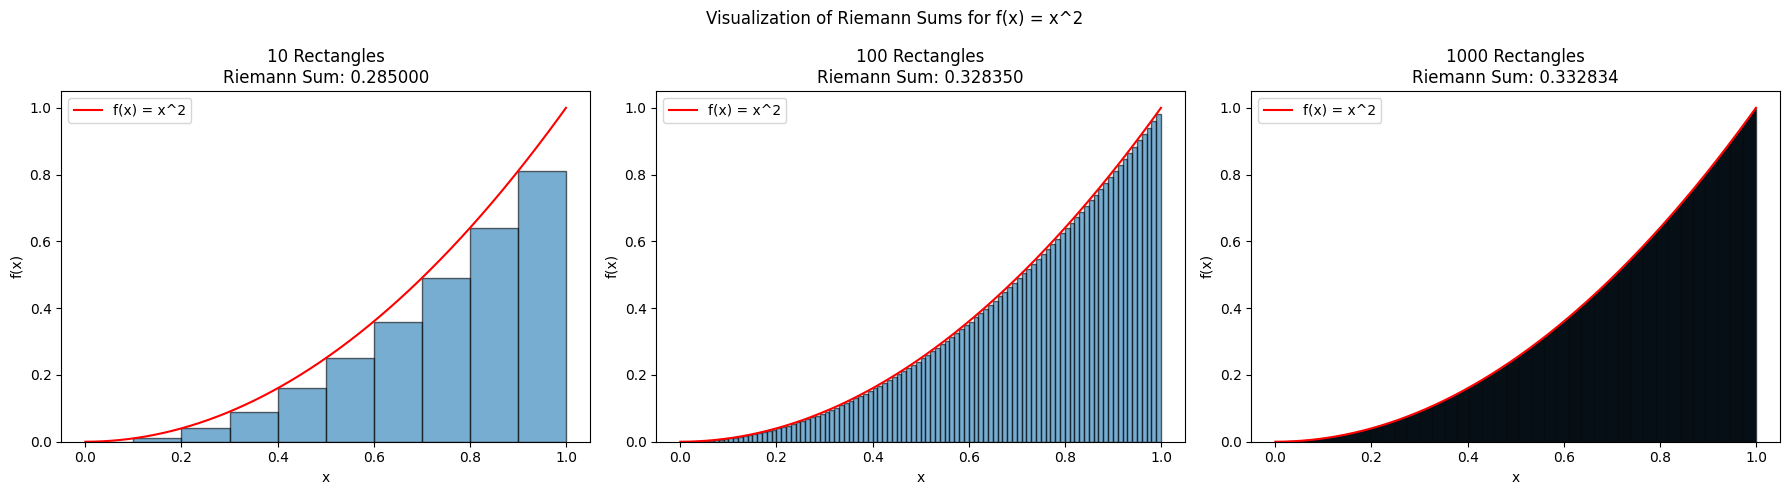

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = x^2
def f(x):
    return x**2

# Define the Riemann sum function
def riemann_sum(f, a, b, n):
    x = np.linspace(a, b, n, endpoint=False)
    dx = (b - a) / n
    return np.sum(f(x) * dx), x, dx

# Interval [0, 1]
a = 0
b = 1

# Number of rectangles
n_values = [10, 100, 1000]

# Prepare the plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Visualization of Riemann Sums for f(x) = x^2')

# Calculate and plot the Riemann sums
for i, n in enumerate(n_values):
    riemann_sum_value, x, dx = riemann_sum(f, a, b, n)
    axs[i].bar(x, f(x), width=dx, align='edge', alpha=0.6, edgecolor='black')
    axs[i].plot(np.linspace(a, b, 1000), f(np.linspace(a, b, 1000)), 'r-', label='f(x) = x^2')
    axs[i].set_title(f'{n} Rectangles\nRiemann Sum: {riemann_sum_value:.6f}')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('f(x)')
    axs[i].legend()

plt.tight_layout()
plt.show()

So easy a caveman can do it!

### Let Us Do Another Example

Now, let's consider the function $f(x) = \sin(x)$ over the interval $[-\pi, \pi]$. Let us calculate this integral numerically using the trapezoidal rule, which sums a series of trapezoids under the curve, instead of rectangles. The trapezoidal rule is given by:

$$
\int_a^b f(x) dx \approx \frac{h}{2} \left[ f(a) + 2 \sum_{i=1}^{n-1} f(x_i) + f(b) \right]
$$

where $h = (b - a) / n$ is the width of each trapezoid. Let's calculate this integral numerically using the Riemann sum with 10, 100, and 1000 rectangles and the trapezoidal rule with 10, 100, and 1000 trapezoids.

```{admonition} Wait!
:class: warning
Before we proceed, can you guess the value of this integral? What can you say about the symmetry of the sine function around the center of the interval of integration?
```

OK, now that we have a guess, let's calculate the integral and compare the results.

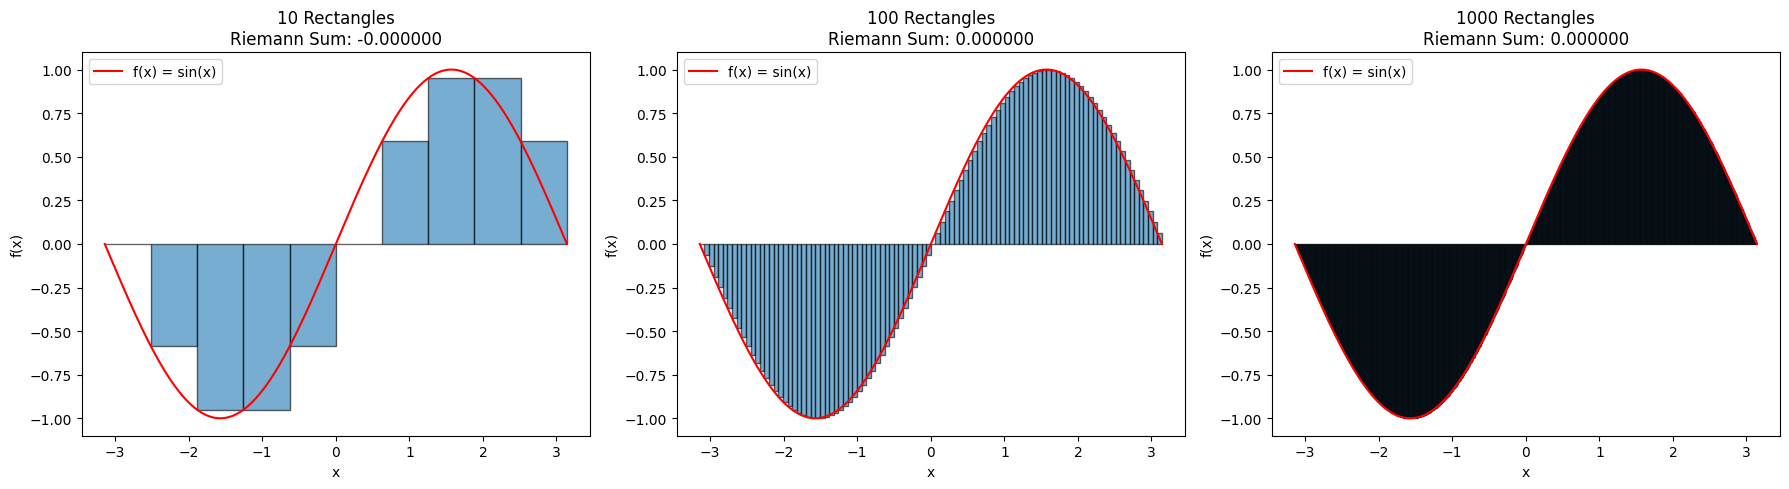

In [4]:
# Interval [-pi, pi]
a = -np.pi
b = np.pi

# Define the function f(x) = sin(x)
def f(x):
    return np.sin(x)

# Prepare the plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Calculate and plot the Riemann sums
for i, n in enumerate(n_values):
    riemann_sum_value, x, dx = riemann_sum(f, a, b, n)
    axs[i].bar(x, f(x), width=dx, align='edge', alpha=0.6, edgecolor='black')
    axs[i].plot(np.linspace(a, b, 1000), f(np.linspace(a, b, 1000)), 'r-', label='f(x) = sin(x)')
    axs[i].set_title(f'{n} Rectangles\nRiemann Sum: {riemann_sum_value:.6f}')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('f(x)')
    axs[i].legend()

plt.tight_layout()
plt.show()

```{admonition} Note
:class: note
Before integrating, always check the symmetry of your function about the center of the integration range. If it is symmetric like the sine function, then you can get away without having to compute the integral. This type of intuition can prove really useful in the chemical sciences.
```

### Calculating the Overlap Integral of Two H 1s Orbitals

Now, let's calculate the overlap integral of two hydrogen 1s orbitals, which are given by:

$$
\psi_{1s} = \left( \frac{1}{\pi a_0^3} \right)^{1/2} e^{-r/a_0}
$$

where $a_0$ is the Bohr radius, which is approximately 0.529 Å. The overlap integral of two 1s orbitals is given by:

$$
S = \int_0^{\infty} \int_0^{\pi} \int_0^{2\pi} \psi_{1s}^*(r, \theta, \phi) \psi_{1s}(r, \theta, \phi) r^2 \sin(\theta) dr d\theta d\phi
$$

